## LiMPIEZA   E INTREGACIÓN DE LOS DATOS EN UN DATSET DE UNA UNICA VISTA MINABLE.

In [1]:
# Librerias y dependencias
import pandas as pd
import numpy as np
from unidecode import  unidecode
import re
pd.options.display.max_columns = None

In [2]:
# Lectura de los diferntes datasets
Productions_Events = pd.read_csv("../Datos/Production_events_3.csv")
fields = pd.read_csv("../Datos/Fields_3.csv")
Productions_Events.tail(3)

,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA
995,4673,4321,4546,4785,8.853453,-75.751192,5/7/2016,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,5/12/2016,59800.0,7/2/2016,9/23/2016,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CÓRDOBA,CERETÉ,2.0
996,4674,4320,4545,4784,9.034286,-75.780458,5/9/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,5/15/2016,70000.0,7/3/2016,9/21/2016,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CÓRDOBA,COTORRA,2.2
997,4675,4319,4544,4784,9.031350,-75.779953,5/9/2016,Mecanizado,17.8,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,P3966 (Pioneer),6400.0,Algodón,SI,5/14/2016,67600.0,7/5/2016,9/21/2016,Mecanizada,6440.0,Grano seco,CARACOL,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14812.0,18.0,NO,NaN,CÓRDOBA,COTORRA,2.3


In [3]:
Productions_Events.columns

Index(['ID_EVENTO', 'ID_LOTE', 'ID_FINCA', 'ID_PROD', 'LAT_LOTE', 'LONG_LOTE',
       'FECHA_SIEMBRA', 'TIPO_SIEMBRA', 'NUM_SEMILLAS', 'SEM_TRATADAS',
       'DIST_SURCOS', 'DIST_PLANTAS', 'TIPO_CULTIVO', 'COLOR_ENDOSPERMO',
       'SEM_POR_SITIO', 'TIPO_DE_SEMILLA', 'HABITO_CRECIMIENTO',
       'MATERIAL_GENETICO', 'OBJ_RDT', 'CULT_ANT', 'DRENAJE',
       'FECHA_EMERGENCIA', 'POBLACION_20DIAS', 'FECHA_FLORACION',
       'FECHA_COSECHA', 'METODO_COSECHA', 'RDT', 'PROD_COSECHADO',
       'NOMBRE_LOTE', 'ORIGEN_SEMILLA', 'INOCULACION_SEMILLAS',
       'NUEVA_INOCULACION_SEMILLAS', 'PRODUCTO_USADO', 'TIPO_MATERIAL',
       'NUEVO_MATERIAL_GENETICO', 'OTRO_CULT_ANT', 'RESIEMBRA',
       'CANTIDAD_TOTAL', 'HUMEDAD', 'ALMACENAMIENTO_FINCA',
       'OBSERVACIONES_COSECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'AREA'],
      dtype='object')

In [4]:
# Se extrae las columnas ID_LOTE y ALTURA_LOT del data.frame y las almacena en nuevas variables
Altura_Lotes = fields[["ID_LOTE","ALTURA_LOT"]]
Altura_Lotes.head(3)

,ID_LOTE,ALTURA_LOT
0,1425,1638
1,1489,1637
2,861,1694


In [5]:
Productions_Events.PROD_COSECHADO.value_counts()

Grano seco          885
Ensilaje             64
Mazorca (fresca)     37
Name: PROD_COSECHADO, dtype: int64

In [6]:
# Se obtienen una copia del dataframe original para su posterior procesamiento
eventos = Productions_Events.copy()
# Filtrar departamento de cordoba, y municipios de interes 
# ===========================================================================
# Se realiza limpieza de datos para las columnas departamento y municipio donde
# se puede evicenciar problemas en el acento.
eventos.DEPARTAMENTO = eventos.DEPARTAMENTO.apply(lambda x: x.replace("Ó","O"))
eventos.MUNICIPIO = eventos.MUNICIPIO.apply(lambda s: unidecode(s))
# Se crea un vector -lista que contiene los departamentos unicos
filDep = eventos.DEPARTAMENTO.unique()[0]
print(filDep)
# Se filtra el dataset para que contenga los registros unicamnete en el departamento
# de cordoba y los registros unicmanete coincidan con el tipo de producto grano seco
evento_cordoba = eventos[(eventos.DEPARTAMENTO=='CORDOBA') & (eventos.PROD_COSECHADO=="Grano seco")]
print("Dimensiones: ",evento_cordoba.shape)
evento_cordoba.tail(5)

CORDOBA
Dimensiones:  (885, 44)


,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA
993,4671,4323,4548,4787,9.018844,-75.758531,5/21/2016,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,5/25/2016,64200.0,7/13/2016,10/4/2016,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0
994,4672,4322,4547,4786,8.871503,-75.772411,5/14/2016,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,5/20/2016,60000.0,7/8/2016,9/30/2016,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1
995,4673,4321,4546,4785,8.853453,-75.751192,5/7/2016,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,5/12/2016,59800.0,7/2/2016,9/23/2016,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0
996,4674,4320,4545,4784,9.034286,-75.780458,5/9/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,5/15/2016,70000.0,7/3/2016,9/21/2016,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2
997,4675,4319,4544,4784,9.031350,-75.779953,5/9/2016,Mecanizado,17.8,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,P3966 (Pioneer),6400.0,Algodón,SI,5/14/2016,67600.0,7/5/2016,9/21/2016,Mecanizada,6440.0,Grano seco,CARACOL,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14812.0,18.0,NO,NaN,CORDOBA,COTORRA,2.3


In [7]:
evento_cordoba.CULT_ANT.unique()

array(['Algodón', 'Maiz', 'Frijol', 'Yuca', 'Pastos', nan], dtype=object)

In [8]:
# Se realiza el mismo tratamineto a la columna CULT_ANT
#evento_cordoba.CULT_ANT = evento_cordoba.CULT_ANT.astype(str)
#evento_cordoba.CULT_ANT = evento_cordoba.CULT_ANT.apply(lambda y: y.upper)

In [9]:
# Se Elimina observaciones donde los lotes tenian una extension menor a una area y los valores de rendimiento, poblacion
# no coinciden
lista_Observaciones_Eliminar = [2685,2690,2692]
# se filtra el datset mediante estas observaciones
evento_cordoba = evento_cordoba[evento_cordoba.ID_LOTE.isin(lista_Observaciones_Eliminar)== False]
print(len(evento_cordoba.columns))
evento_cordoba.tail(5)


44


,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA
993,4671,4323,4548,4787,9.018844,-75.758531,5/21/2016,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,5/25/2016,64200.0,7/13/2016,10/4/2016,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0
994,4672,4322,4547,4786,8.871503,-75.772411,5/14/2016,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,5/20/2016,60000.0,7/8/2016,9/30/2016,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1
995,4673,4321,4546,4785,8.853453,-75.751192,5/7/2016,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,5/12/2016,59800.0,7/2/2016,9/23/2016,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0
996,4674,4320,4545,4784,9.034286,-75.780458,5/9/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,5/15/2016,70000.0,7/3/2016,9/21/2016,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2
997,4675,4319,4544,4784,9.031350,-75.779953,5/9/2016,Mecanizado,17.8,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,P3966 (Pioneer),6400.0,Algodón,SI,5/14/2016,67600.0,7/5/2016,9/21/2016,Mecanizada,6440.0,Grano seco,CARACOL,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14812.0,18.0,NO,NaN,CORDOBA,COTORRA,2.3


In [10]:
#  AJUSTE DEL RENDIMIENTO R-AJUT A UNA VALOR MAS REAL
# ==============================================================================
evento_cordoba["RDT_AJUSTADO"] = (100 -evento_cordoba.HUMEDAD)/(100-14)*evento_cordoba.RDT
print(len(evento_cordoba.columns))
evento_cordoba.tail(10)

45


,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA,RDT_AJUSTADO
988,4666,4165,4391,4718,9.094833,-75.783186,5/23/2016,Mecanizado,18.0,NO,0.8,0.20,Maiz,Amarillo,1.0,NaN,NaN,Otro,6100.0,Algodón,SI,5/28/2016,59000.0,7/19/2016,10/8/2016,Mecanizada,6160.0,Grano seco,LAS MARIAS,NaN,NaN,NaN,NaN,OGM,DK 7088 VTPRO,NaN,NaN,20910.0,18.0,NO,NaN,CORDOBA,COTORRA,3.4,5873.488372
989,4667,4161,4387,4716,9.075958,-75.721369,5/8/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Amarillo,1.0,NaN,NaN,ADV 9293 (Syngenta),7200.0,Algodón,SI,5/14/2016,67000.0,7/4/2016,9/24/2016,Manual,7000.0,Grano seco,LA ESPERANZA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,32200.0,18.0,NO,NaN,CORDOBA,CHIMA,4.6,6674.418605
990,4668,4160,4386,4716,9.073700,-75.720725,5/8/2016,Mecanizado,18.0,NO,0.8,0.18,Maiz,Amarillo,1.0,NaN,NaN,Otro,7800.0,Algodón,SI,5/13/2016,70000.0,7/2/2016,9/26/2016,Mecanizada,7000.0,Grano seco,LA COMPAÑIA,NaN,NaN,NaN,NaN,Hibrido,SV 1035,NaN,NaN,30100.0,18.0,NO,NaN,CORDOBA,CHIMA,4.3,6674.418605
991,4669,4256,4484,4752,9.076806,-75.726611,5/23/2016,Mecanizado,18.2,NO,0.8,0.20,Maiz,Amarillo,1.0,NaN,NaN,Otro,6780.0,Algodón,SI,5/28/2016,60000.0,7/17/2016,10/10/2016,Mecanizada,6500.0,Grano seco,LA ESPERANZA,NaN,NaN,NaN,NaN,Hibrido,ADT-9293,NaN,NaN,14300.0,18.0,NO,NaN,CORDOBA,COTORRA,2.2,6197.674419
992,4670,4268,4496,4756,9.086806,-75.735900,5/11/2016,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,7100.0,Maiz,SI,5/17/2016,61000.0,7/5/2016,9/22/2016,Manual,6980.0,Grano seco,EL CAMPANITO,NaN,NaN,NaN,NaN,Hibrido,ADT-9339,NaN,NaN,6980.0,17.0,NO,NaN,CORDOBA,COTORRA,1.0,6736.511628
993,4671,4323,4548,4787,9.018844,-75.758531,5/21/2016,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,5/25/2016,64200.0,7/13/2016,10/4/2016,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0,6900.581395
994,4672,4322,4547,4786,8.871503,-75.772411,5/14/2016,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,5/20/2016,60000.0,7/8/2016,9/30/2016,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1,5983.720930
995,4673,4321,4546,4785,8.853453,-75.751192,5/7/2016,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,5/12/2016,59800.0,7/2/2016,9/23/2016,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0,6105.325581
996,4674,4320,4545,4784,9.034286,-75.780458,5/9/2016,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,5/15/2016,70000.0,7/3/2016,9/21/2016,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2,6216.279070
997,4675,4319,4544,4784,9.031350,-75.779953,5/9/2016,Mecanizado,17.8,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,P3966 (Pioneer),6400.0,Algodón,SI,5/14/2016,67600.0,7/5/2016,9/21/2016,Mecanizada,6440.0,Grano seco,CARACOL,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14812.0,18.0,NO,NaN,CORDOBA,COTORRA,2.3,6140.465116


### AJUSTE DE LAS FECHAS

In [11]:
# Inicilamnete se identifica las columnas que empiezan con el nombre fecha
# FECHA_SIEMBRA
# FECHA_EMERGENCIA
# FECHA_FLORACION
# FECHA_COSECHA
evento_cordoba.columns

Index(['ID_EVENTO', 'ID_LOTE', 'ID_FINCA', 'ID_PROD', 'LAT_LOTE', 'LONG_LOTE',
       'FECHA_SIEMBRA', 'TIPO_SIEMBRA', 'NUM_SEMILLAS', 'SEM_TRATADAS',
       'DIST_SURCOS', 'DIST_PLANTAS', 'TIPO_CULTIVO', 'COLOR_ENDOSPERMO',
       'SEM_POR_SITIO', 'TIPO_DE_SEMILLA', 'HABITO_CRECIMIENTO',
       'MATERIAL_GENETICO', 'OBJ_RDT', 'CULT_ANT', 'DRENAJE',
       'FECHA_EMERGENCIA', 'POBLACION_20DIAS', 'FECHA_FLORACION',
       'FECHA_COSECHA', 'METODO_COSECHA', 'RDT', 'PROD_COSECHADO',
       'NOMBRE_LOTE', 'ORIGEN_SEMILLA', 'INOCULACION_SEMILLAS',
       'NUEVA_INOCULACION_SEMILLAS', 'PRODUCTO_USADO', 'TIPO_MATERIAL',
       'NUEVO_MATERIAL_GENETICO', 'OTRO_CULT_ANT', 'RESIEMBRA',
       'CANTIDAD_TOTAL', 'HUMEDAD', 'ALMACENAMIENTO_FINCA',
       'OBSERVACIONES_COSECHA', 'DEPARTAMENTO', 'MUNICIPIO', 'AREA',
       'RDT_AJUSTADO'],
      dtype='object')

In [12]:
# Se verifica el tipo de dato de als columnas
evento_cordoba.FECHA_SIEMBRA

0      5/13/2013
1       5/2/2013
2      5/12/2013
3       5/7/2013
4       5/7/2013
         ...    
993    5/21/2016
994    5/14/2016
995     5/7/2016
996     5/9/2016
997     5/9/2016
Name: FECHA_SIEMBRA, Length: 882, dtype: object

In [13]:
# se realiza la conversion de las columnas fecha a tipo data-time

evento_cordoba.FECHA_SIEMBRA = pd.to_datetime(evento_cordoba.FECHA_SIEMBRA, infer_datetime_format=True)
evento_cordoba.FECHA_EMERGENCIA = pd.to_datetime(evento_cordoba.FECHA_EMERGENCIA, infer_datetime_format=True)
evento_cordoba.FECHA_FLORACION = pd.to_datetime(evento_cordoba.FECHA_FLORACION, infer_datetime_format=True)
evento_cordoba.FECHA_COSECHA = pd.to_datetime(evento_cordoba.FECHA_COSECHA, infer_datetime_format=True)


In [14]:
# Se calcula la diferencia en dias entre cada una de las etapas del cultivo
evento_cordoba["DIAS_EN_EMERGER"] = (evento_cordoba.FECHA_EMERGENCIA- evento_cordoba.FECHA_SIEMBRA)
evento_cordoba["DIAS_EN_EMERGER_A_FLORECER"] = (evento_cordoba.FECHA_FLORACION- evento_cordoba.FECHA_EMERGENCIA)
evento_cordoba["DIAS_EN_FLORECER_A_COSECHAR"] = (evento_cordoba.FECHA_COSECHA- evento_cordoba.FECHA_FLORACION)

In [15]:
evento_cordoba

,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA,RDT_AJUSTADO,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR
0,53,40,42,13,8.877222,-75.764444,2013-05-13,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,2.0,NaN,NaN,PIONEER 30F32,5000.0,Algodón,SI,2013-05-18,60000.0,2013-07-20,2013-09-26,Manual,5000.0,Grano seco,VILLA GABRIELA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,5000.0,18.0,NO,NaN,CORDOBA,CERETE,1.0,4767.441860,5 days,63 days,68 days
1,54,43,43,14,8.879167,-75.765556,2013-05-02,Mecanizado,60000.0,SI,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,DK 234,5.0,Maiz,SI,2013-05-07,60000.0,2013-07-10,2013-09-11,Manual,5000.0,Grano seco,VILLA LOURDES,NaN,NaN,NaN,Insecticidas,Hibrido,NaN,NaN,NaN,5000.0,20.0,NO,NaN,CORDOBA,CERETE,1.0,4651.162791,5 days,64 days,63 days
2,56,44,44,15,8.880000,-75.765833,2013-05-12,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,PIONEER 30F32,5.0,Algodón,SI,2013-05-17,60000.0,2013-07-15,2013-09-19,Manual,5500.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,5500.0,19.0,NO,NaN,CORDOBA,CERETE,1.0,5180.232558,5 days,59 days,66 days
3,57,45,45,16,8.878611,-75.758889,2013-05-07,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,5.0,Algodón,SI,2013-05-12,60000.0,2013-07-15,2013-09-12,Manual,5200.0,Grano seco,PALMAR,NaN,NaN,NaN,NaN,Hibrido,7019,NaN,NaN,5200.0,19.0,NO,NaN,CORDOBA,CERETE,1.0,4897.674419,5 days,64 days,59 days
4,273,46,46,17,8.876389,-75.759167,2013-05-07,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,5000.0,Algodón,SI,2013-05-12,60000.0,2013-07-14,2013-09-12,Manual,5700.0,Grano seco,DONDE FIDEL,NaN,NaN,NaN,NaN,Hibrido,7019,NaN,NaN,5700.0,20.0,NO,NaN,CORDOBA,CERETE,1.0,5302.325581,5 days,63 days,60 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,4671,4323,4548,4787,9.018844,-75.758531,2016-05-21,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,2016-05-25,64200.0,2016-07-13,2016-10-04,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0,6900.581395,4 days,49 days,83 days
994,4672,4322,4547,4786,8.871503,-75.772411,2016-05-14,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,2016-05-20,60000.0,2016-07-08,2016-09-30,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1,5983.720930,6 days,49 days,84 days
995,4673,4321,4546,4785,8.853453,-75.751192,2016-05-07,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,2016-05-12,59800.0,2016-07-02,2016-09-23,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0,6105.325581,5 days,51 days,83 days
996,4674,4320,4545,4784,9.034286,-75.780458,2016-05-09,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,2016-05-15,70000.0,2016-07-03,2016-09-21,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2,6216.279070,6 days,49 days,80 days


In [16]:
# Se ajusta el numero de plantas contadas a los 20 dias
evento_cordoba.POBLACION_20DIAS.describe()

count       875.000000
mean      63815.344000
std        9324.471838
min        6000.000000
25%       60000.000000
50%       62500.000000
75%       71000.000000
max      180000.000000
Name: POBLACION_20DIAS, dtype: float64

In [17]:
evento_cordoba.AREA.describe()

count    882.000000
mean       4.010658
std        5.670576
min        1.000000
25%        1.125000
50%        2.000000
75%        4.000000
max       55.000000
Name: AREA, dtype: float64

In [18]:
# Segun observaciones de los agricultores la FIAT Y FENALCE en una AREA no puede existir mas de  90.000 plantas
# por tal motivo puede darse el caso que un agricultor no realizo a decuadamente la captura de estos datos e información
# se debe Ajustar ese valor de area

# Funcion para realizar el ajuste de los 20 dias
def PoblacionAjustada(pob_20_dias,area):
    # Solamante para verificar que el ajuste y la introduccion de los datos se realizo de manera correcta.
    if pob_20_dias < 90000:
        poblacion = pob_20_dias
    else:
        poblacion = pob_20_dias/area
    
    return poblacion

# Funcion para realizar el ajuste de las fechas dejando unicmanete la cantidad numerica.


In [19]:
# Se realiza el ajuste de la población a los 20 dias
evento_cordoba["POBLACION_20DIAS_AJT"] = evento_cordoba.POBLACION_20DIAS.apply(lambda x: PoblacionAjustada(x,evento_cordoba.AREA))

In [20]:
evento_cordoba.POBLACION_20DIAS_AJT

0      60000.0
1      60000.0
2      60000.0
3      60000.0
4      60000.0
        ...   
993    64200.0
994    60000.0
995    59800.0
996    70000.0
997    67600.0
Name: POBLACION_20DIAS_AJT, Length: 882, dtype: object

In [21]:
# Se recupera unicamnete los registros pertenecientes al departamento de cordoba
print("Ids Unicos extraidos del fichero LOTES(Fields): ",len(Altura_Lotes.ID_LOTE.unique()))
print("IDs unicos del departamento de Cordoba: ", len(evento_cordoba.ID_LOTE.unique()))

Ids Unicos extraidos del fichero LOTES(Fields):  4004
IDs unicos del departamento de Cordoba:  882


In [22]:
Lista_ID_unicos_cordoba = list (evento_cordoba.ID_LOTE.unique())
Lista_ID_unicos_cordoba

[40,
 43,
 44,
 45,
 46,
 47,
 51,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 276,
 277,
 278,
 470,
 471,
 469,
 475,
 478,
 479,
 480,
 484,
 485,
 514,
 515,
 651,
 654,
 665,
 666,
 667,
 669,
 670,
 671,
 672,
 653,
 668,
 673,
 674,
 676,
 680,
 681,
 682,
 683,
 689,
 690,
 692,
 693,
 694,
 696,
 697,
 699,
 700,
 701,
 702,
 703,
 704,
 705,
 706,
 710,
 711,
 712,
 714,
 715,
 716,
 717,
 1547,
 1548,
 1549,
 1550,
 1555,
 1575,
 1576,
 1789,
 1790,
 1792,
 1793,
 1794,
 1796,
 1797,
 1798,
 1799,
 1800,
 1801,
 1803,
 1804,
 1805,
 1812,
 1814,
 1815,
 1816,
 1820,
 1822,
 1823,
 1824,
 1825,
 1826,
 1827,
 1828,
 1829,
 1833,
 1830,
 1871,
 1818,
 1819,
 1872,
 1795,
 1879,
 1880,
 1881,
 1887,
 1904,
 1886,
 1889,
 1891,
 1894,
 1897,
 1898,
 1899,
 1884,
 1905,
 1906,
 1907,
 1902,
 1908,
 1903,
 1909,
 1910,
 1831,
 1911,
 1912,
 1913,
 1940,
 1939,
 1938,
 1937,
 1936,
 1935,
 1934,
 1932,
 1946,
 1933,
 1947,
 1948,
 1950,
 1952,
 1953,
 1954,
 1955,
 1929,
 1927,
 192

In [23]:
#se recupera unicamente los registros del deparatamento de cordoba  - para el fichero lotes
# Donde se tienen cada uno de los lotes asociados al departamento

Altura_Lotes = Altura_Lotes[Altura_Lotes.ID_LOTE.isin(Lista_ID_unicos_cordoba)]
Altura_Lotes.shape

(882, 2)

In [24]:
# Al dataframe eventos cordoba adicionamos la columna altura lote del fichero (Altura Lotes)
evento_cordoba = pd.merge( evento_cordoba,Altura_Lotes)

In [25]:
evento_cordoba

,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,LAT_LOTE,LONG_LOTE,FECHA_SIEMBRA,TIPO_SIEMBRA,NUM_SEMILLAS,SEM_TRATADAS,DIST_SURCOS,DIST_PLANTAS,TIPO_CULTIVO,COLOR_ENDOSPERMO,SEM_POR_SITIO,TIPO_DE_SEMILLA,HABITO_CRECIMIENTO,MATERIAL_GENETICO,OBJ_RDT,CULT_ANT,DRENAJE,FECHA_EMERGENCIA,POBLACION_20DIAS,FECHA_FLORACION,FECHA_COSECHA,METODO_COSECHA,RDT,PROD_COSECHADO,NOMBRE_LOTE,ORIGEN_SEMILLA,INOCULACION_SEMILLAS,NUEVA_INOCULACION_SEMILLAS,PRODUCTO_USADO,TIPO_MATERIAL,NUEVO_MATERIAL_GENETICO,OTRO_CULT_ANT,RESIEMBRA,CANTIDAD_TOTAL,HUMEDAD,ALMACENAMIENTO_FINCA,OBSERVACIONES_COSECHA,DEPARTAMENTO,MUNICIPIO,AREA,RDT_AJUSTADO,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT
0,53,40,42,13,8.877222,-75.764444,2013-05-13,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,2.0,NaN,NaN,PIONEER 30F32,5000.0,Algodón,SI,2013-05-18,60000.0,2013-07-20,2013-09-26,Manual,5000.0,Grano seco,VILLA GABRIELA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,5000.0,18.0,NO,NaN,CORDOBA,CERETE,1.0,4767.441860,5 days,63 days,68 days,60000.0,13
1,54,43,43,14,8.879167,-75.765556,2013-05-02,Mecanizado,60000.0,SI,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,DK 234,5.0,Maiz,SI,2013-05-07,60000.0,2013-07-10,2013-09-11,Manual,5000.0,Grano seco,VILLA LOURDES,NaN,NaN,NaN,Insecticidas,Hibrido,NaN,NaN,NaN,5000.0,20.0,NO,NaN,CORDOBA,CERETE,1.0,4651.162791,5 days,64 days,63 days,60000.0,15
2,56,44,44,15,8.880000,-75.765833,2013-05-12,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,PIONEER 30F32,5.0,Algodón,SI,2013-05-17,60000.0,2013-07-15,2013-09-19,Manual,5500.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,NaN,NaN,NaN,5500.0,19.0,NO,NaN,CORDOBA,CERETE,1.0,5180.232558,5 days,59 days,66 days,60000.0,12
3,57,45,45,16,8.878611,-75.758889,2013-05-07,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,5.0,Algodón,SI,2013-05-12,60000.0,2013-07-15,2013-09-12,Manual,5200.0,Grano seco,PALMAR,NaN,NaN,NaN,NaN,Hibrido,7019,NaN,NaN,5200.0,19.0,NO,NaN,CORDOBA,CERETE,1.0,4897.674419,5 days,64 days,59 days,60000.0,12
4,273,46,46,17,8.876389,-75.759167,2013-05-07,Mecanizado,60000.0,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,5000.0,Algodón,SI,2013-05-12,60000.0,2013-07-14,2013-09-12,Manual,5700.0,Grano seco,DONDE FIDEL,NaN,NaN,NaN,NaN,Hibrido,7019,NaN,NaN,5700.0,20.0,NO,NaN,CORDOBA,CERETE,1.0,5302.325581,5 days,63 days,60 days,60000.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,4671,4323,4548,4787,9.018844,-75.758531,2016-05-21,Manual,17.5,NO,0.8,0.40,Maiz,Amarillo,3.0,NaN,NaN,Otro,5300.0,Maiz,SI,2016-05-25,64200.0,2016-07-13,2016-10-04,Manual,7150.0,Grano seco,SANTA MARTA,NaN,NaN,NaN,NaN,Hibrido,SV-1035,NaN,NaN,7150.0,17.0,NO,NaN,CORDOBA,SAN PELAYO,1.0,6900.581395,4 days,49 days,83 days,64200.0,18
878,4672,4322,4547,4786,8.871503,-75.772411,2016-05-14,Mecanizado,19.2,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,6980.0,Maiz,SI,2016-05-20,60000.0,2016-07-08,2016-09-30,Mecanizada,6200.0,Grano seco,SALSIPUEDES,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,13020.0,17.0,NO,NaN,CORDOBA,CERETE,2.1,5983.720930,6 days,49 days,84 days,60000.0,16
879,4673,4321,4546,4785,8.853453,-75.751192,2016-05-07,Mecanizado,17.4,NO,0.8,0.20,Maiz,Blanco,1.0,NaN,NaN,Otro,NaN,Algodón,NO,2016-05-12,59800.0,2016-07-02,2016-09-23,Mecanizada,6326.0,Grano seco,LA PALMERA,NaN,NaN,NaN,NaN,Hibrido,SV-7019,NaN,NaN,12652.0,17.0,NO,NaN,CORDOBA,CERETE,2.0,6105.325581,5 days,51 days,83 days,59800.0,16
880,4674,4320,4545,4784,9.034286,-75.780458,2016-05-09,Mecanizado,18.5,NO,0.8,0.18,Maiz,Blanco,1.0,NaN,NaN,DK 234 YGRR,6520.0,Algodón,SI,2016-05-15,70000.0,2016-07-03,2016-09-21,Mecanizada,6600.0,Grano seco,TIGRE,NaN,NaN,NaN,NaN,OGM,NaN,NaN,NaN,14520.0,19.0,NO,NaN,CORDOBA,COTORRA,2.2,6216.279070,6 days,49 days,80 days,70000.0,17


In [26]:
print("Cantidad de variables antes de eliminar: ",len(evento_cordoba.columns))

Cantidad de variables antes de eliminar:  50


In [27]:
# Se extraen las columnas clave , que se seran utilizadas para cruzar otro tipo de información

eventosParaFechas =evento_cordoba[["ID_EVENTO","ID_LOTE","FECHA_SIEMBRA","FECHA_EMERGENCIA","FECHA_COSECHA","FECHA_FLORACION"]]
eventosParaFechas.tail(2)

,ID_EVENTO,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION
880,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03
881,4675,4319,2016-05-09,2016-05-14,2016-09-21,2016-07-05


In [28]:
# Se seleccionan las columnas que podran ser utilizadas para  calculos climaticos 

variablesClima = ["ID_EVENTO","ID_LOTE","ID_FINCA","ID_PROD","FECHA_SIEMBRA","LAT_LOTE","LONG_LOTE","FECHA_EMERGENCIA","FECHA_FLORACION","FECHA_COSECHA","DEPARTAMENTO","MUNICIPIO","PROD_COSECHADO","RDT_AJUSTADO"]
evenParaClima = evento_cordoba[variablesClima]
evenParaClima.tail(2)


,ID_EVENTO,ID_LOTE,ID_FINCA,ID_PROD,FECHA_SIEMBRA,LAT_LOTE,LONG_LOTE,FECHA_EMERGENCIA,FECHA_FLORACION,FECHA_COSECHA,DEPARTAMENTO,MUNICIPIO,PROD_COSECHADO,RDT_AJUSTADO
880,4674,4320,4545,4784,2016-05-09,9.034286,-75.780458,2016-05-15,2016-07-03,2016-09-21,CORDOBA,COTORRA,Grano seco,6216.279070
881,4675,4319,4544,4784,2016-05-09,9.031350,-75.779953,2016-05-14,2016-07-05,2016-09-21,CORDOBA,COTORRA,Grano seco,6140.465116


##### COLUMNAS A ELIMINAAR
- Se eliminan las siguientes columnas por ser identificadores: ID_PROD, ID_FINCA, DEPARTAMENTO, MUNICIPIO
- Por ser utilizadas para la generacion de columnas derivadas: LAT_LOTE, LONG_LOTE, RDT, FECHA_SIEMBRA, FECHA_EMERGENCIA, FECHA_FLORACION, FECHA_COSECHA, POBLACION_20DIAS, HUMEDAD, RDT, CANTIDAD_TOTAL
- Demasiados datos faltantes: RESIEMBRA, OBSERVACIONES_COSECHA
- Inconsistencias en las unidades de medidas: NUM_SEMILLAS v2
- Mal recolectada lainformacion segun expertos de la FIAT y FENALCE: DIST_PLANTAS,DIST_SURCOS,SEM_POR_SITIO,COLOR_ENDOSPERMO,TIPO_MATERIAL

In [29]:
# se eliminar todas la columnas  del datset Original
VariablesEliminar  = ["ID_PROD","ID_FINCA","LAT_LOTE","LONG_LOTE","TIPO_CULTIVO","TIPO_DE_SEMILLA","HABITO_CRECIMIENTO","OBJ_RDT","RDT","NOMBRE_LOTE","ORIGEN_SEMILLA","INOCULACION_SEMILLAS","NUEVA_INOCULACION_SEMILLAS","HUMEDAD","OBSERVACIONES_COSECHA","DEPARTAMENTO","MUNICIPIO",
                     "NUM_SEMILLAS","CANTIDAD_TOTAL","FECHA_SIEMBRA","FECHA_EMERGENCIA","FECHA_FLORACION","FECHA_COSECHA","PROD_COSECHADO","NUEVO_MATERIAL_GENETICO","OTRO_CULT_ANT","PRODUCTO_USADO","RESIEMBRA","POBLACION_20DIAS","DIST_PLANTAS","DIST_SURCOS"
                     ,"SEM_POR_SITIO","COLOR_ENDOSPERMO","TIPO_MATERIAL"]


evento_cordoba = evento_cordoba.drop(VariablesEliminar,axis=1)
print("Cantidad de variables despues de eliminar: ",len(evento_cordoba.columns))

Cantidad de variables despues de eliminar:  16


In [30]:
# Se guarda toda esa informacione n una rchivo exel para posterior analizar y procesamiento
evenParaClima.to_excel("../Archivos Generados/cordoba_clima.xlsx")
evento_cordoba.to_excel("../Archivos Generados/eventos_cordoba_2017.xlsx")

### PROCESAMIENTO PARA EL ARCHIVO CONTROLS

In [31]:
# Lectura del archivo controls
# lectura del archivo
controls = pd.read_csv("../Datos/Controls_3.csv")

In [32]:
print("Cantidad de registros Iniciales en el datset: ",controls.shape)
controls.head(2)

Cantidad de registros Iniciales en el datset:  (7590, 6)


,ID_EVENTO,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA
0,16,34,5/1/2013,Plagas,Químico,PROFENOFOS 50% + LUFENURON
1,16,34,5/1/2013,Malezas,Químico,Glifosato


In [33]:
# Se recuperan unicamante los registros pertenecientes al departamento de Cordoba
Lista_IDEvento_Unicos_cordoba = list (evento_cordoba.ID_EVENTO.unique())
print("Cantidad de eventos unicos del departamento de cordoba: ", len(Lista_IDEvento_Unicos_cordoba))

Cantidad de eventos unicos del departamento de cordoba:  882


Cantidad de registro de controles filtrados de acuerdo al ID Evento:  3128


<AxesSubplot:>

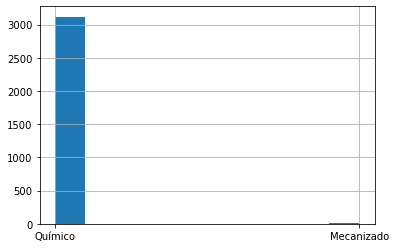

In [34]:
# Se filtra el dataset controls con los IDs Eventos unicos pertenecientes a dicjo departamento
controls = controls[controls.ID_EVENTO.isin(Lista_IDEvento_Unicos_cordoba)]
print("Cantidad de registro de controles filtrados de acuerdo al ID Evento: ", len(controls))
# Diagrama de frecuencias del tipo de control

controls.TIPO_CONTROL.hist()

In [35]:
# resumen del datset controls
controls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3128 entries, 45 to 7395
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID_EVENTO        3128 non-null   int64 
 1   ID_PROD          3128 non-null   int64 
 2   FECHA_CONTROL    3128 non-null   object
 3   TIPO_OBJETIVO    3128 non-null   object
 4   TIPO_CONTROL     3128 non-null   object
 5   MOLECULA_ACTIVA  3119 non-null   object
dtypes: int64(2), object(4)
memory usage: 171.1+ KB


In [36]:
controls.TIPO_CONTROL

45      Químico
46      Químico
47      Químico
48      Químico
49      Químico
         ...   
7391    Químico
7392    Químico
7393    Químico
7394    Químico
7395    Químico
Name: TIPO_CONTROL, Length: 3128, dtype: object

In [37]:
def funcionConcatenarTexto(cadena1,cadena2):
    nuevacadena = "cont"+cadena1[0:3]+cadena2[0:3]
    return nuevacadena

#print(funcionConcatenarTexto("perro","Labrador"))

In [38]:
# Se adiciona una nueva columna y en esta se va almacenado un String que contiene la siguiente concatenacion:
# Cont + las 3 primeras letras del valor en la columna tipo_objetivo + las 3 primeras letras del valor en la columna tipo_control.
# Ref: https://towardsdatascience.com/apply-and-lambda-usage-in-pandas-b13a1ea037f7

controls["ContTip"] = controls.apply(lambda x: funcionConcatenarTexto(x.TIPO_OBJETIVO,x.TIPO_CONTROL),axis=1)


In [39]:
# Verificacion de la nueva columna
controls.ContTip

45      contPlaQuí
46      contMalQuí
47      contPlaQuí
48      contMalQuí
49      contMalQuí
           ...    
7391    contMalQuí
7392    contPlaQuí
7393    contMalQuí
7394    contPlaQuí
7395    contMalQuí
Name: ContTip, Length: 3128, dtype: object

In [40]:
# Se genera una tabla donde por cada valor de la columna id_evento se observa el numero de repeticiones en los valores encontrados en la columna ContTip
# dicho de otro modo: cantidad de controles hechas de cada objetivo y tipo en cada siembra

cont = pd.crosstab(index=controls.ID_EVENTO, columns=controls.ContTip)
cont

ContTip,contEnfQuí,contMalMec,contMalQuí,contPlaQuí
ID_EVENTO,,,,
53,0,0,1,1
54,0,0,1,1
56,0,0,1,0
57,0,0,2,0
273,0,0,1,1
...,...,...,...,...
4671,0,0,1,2
4672,0,0,1,2
4673,0,0,1,2


In [41]:
# Resumen del nuevo datset
cont.describe()

ContTip,contEnfQuí,contMalMec,contMalQuí,contPlaQuí
count,836.000000,836.000000,836.000000,836.000000
mean,0.167464,0.010766,1.638756,1.924641
std,0.435759,0.114270,0.909632,1.400707
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000
50%,0.000000,0.000000,2.000000,2.000000
75%,0.000000,0.000000,2.000000,2.000000
max,3.000000,2.000000,5.000000,12.000000


In [42]:
# Se coloca fecha control al formato data-time
controls.FECHA_CONTROL = pd.to_datetime(controls.FECHA_CONTROL,infer_datetime_format=True)
controls.FECHA_CONTROL

45     2013-06-06
46     2013-06-11
47     2013-06-29
48     2013-06-25
49     2013-06-05
          ...    
7391   2016-06-03
7392   2016-06-03
7393   2016-06-09
7394   2016-06-05
7395   2016-06-11
Name: FECHA_CONTROL, Length: 3128, dtype: datetime64[ns]

In [43]:
controls

,ID_EVENTO,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA,ContTip
45,53,13,2013-06-06,Plagas,Químico,Cipermetrina,contPlaQuí
46,53,13,2013-06-11,Malezas,Químico,Glifosato,contMalQuí
47,54,14,2013-06-29,Plagas,Químico,Cipermetrina,contPlaQuí
48,54,14,2013-06-25,Malezas,Químico,Glifosato,contMalQuí
49,56,15,2013-06-05,Malezas,Químico,Glifosato,contMalQuí
...,...,...,...,...,...,...,...
7391,4673,4785,2016-06-03,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí
7392,4674,4784,2016-06-03,Plagas,Químico,SPINETORAM,contPlaQuí
7393,4674,4784,2016-06-09,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí
7394,4675,4784,2016-06-05,Plagas,Químico,SPINETORAM,contPlaQuí


In [44]:
# Se adiciona al data.frame las columnas que contienen las fechas de siembra, emergencia, floracion y cosecha de los eventos
controlesEnEventos = pd.merge(eventosParaFechas,controls,how='inner')
controlesEnEventos

,ID_EVENTO,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA,ContTip
0,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-06,Plagas,Químico,Cipermetrina,contPlaQuí
1,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-11,Malezas,Químico,Glifosato,contMalQuí
2,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-29,Plagas,Químico,Cipermetrina,contPlaQuí
3,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-25,Malezas,Químico,Glifosato,contMalQuí
4,56,44,2013-05-12,2013-05-17,2013-09-19,2013-07-15,15,2013-06-05,Malezas,Químico,Glifosato,contMalQuí
...,...,...,...,...,...,...,...,...,...,...,...,...
3123,4673,4321,2016-05-07,2016-05-12,2016-09-23,2016-07-02,4785,2016-06-03,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí
3124,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03,4784,2016-06-03,Plagas,Químico,SPINETORAM,contPlaQuí
3125,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03,4784,2016-06-09,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí
3126,4675,4319,2016-05-09,2016-05-14,2016-09-21,2016-07-05,4784,2016-06-05,Plagas,Químico,SPINETORAM,contPlaQuí


In [52]:
def funcion1(x):
    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contPlaQuí":
        return 1
    else:
        return 0


In [66]:
def funcion2(x):
    if (x.FECHA_CONTROL < x.FECHA_SIEMBRA) and  x.ContTip == "contMalQuí":
        return 1
    else:
        return 0


In [73]:
controlesEnEventos

,ID_EVENTO,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA,ContTip,COLUMAN1,COLUMAN2
0,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-06,Plagas,Químico,Cipermetrina,contPlaQuí,0,0
1,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-11,Malezas,Químico,Glifosato,contMalQuí,0,0
2,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-29,Plagas,Químico,Cipermetrina,contPlaQuí,0,0
3,54,43,2013-05-02,2013-05-07,2013-09-11,2013-07-10,14,2013-06-25,Malezas,Químico,Glifosato,contMalQuí,0,0
4,56,44,2013-05-12,2013-05-17,2013-09-19,2013-07-15,15,2013-06-05,Malezas,Químico,Glifosato,contMalQuí,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3123,4673,4321,2016-05-07,2016-05-12,2016-09-23,2016-07-02,4785,2016-06-03,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí,0,0
3124,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03,4784,2016-06-03,Plagas,Químico,SPINETORAM,contPlaQuí,0,0
3125,4674,4320,2016-05-09,2016-05-15,2016-09-21,2016-07-03,4784,2016-06-09,Malezas,Químico,GLUFOSINATO DE AMONIO,contMalQuí,0,0
3126,4675,4319,2016-05-09,2016-05-14,2016-09-21,2016-07-05,4784,2016-06-05,Plagas,Químico,SPINETORAM,contPlaQuí,0,0


In [67]:
controlesEnEventos["COLUMAN1"] = controlesEnEventos.apply(funcion1,axis=1)
controlesEnEventos["COLUMAN2"] = controlesEnEventos.apply(funcion2,axis=1)

In [78]:
controlesEnEventosAgupadas = controlesEnEventos.groupby(["ID_EVENTO"]).count()['COLUMAN1']

In [79]:
controlesEnEventosAgupadas 

ID_EVENTO
53      2
54      2
56      1
57      2
273     2
       ..
4671    3
4672    3
4673    3
4674    2
4675    2
Name: COLUMAN1, Length: 836, dtype: int64

In [68]:
controlesEnEventos[controlesEnEventos.ID_EVENTO==53]

,ID_EVENTO,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA,ContTip,COLUMAN1,COLUMAN2
0,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-06,Plagas,Químico,Cipermetrina,contPlaQuí,0,0
1,53,40,2013-05-13,2013-05-18,2013-09-26,2013-07-20,13,2013-06-11,Malezas,Químico,Glifosato,contMalQuí,0,0


In [69]:
controlesEnEventos.loc[0]

ID_EVENTO                            53
ID_LOTE                              40
FECHA_SIEMBRA       2013-05-13 00:00:00
FECHA_EMERGENCIA    2013-05-18 00:00:00
FECHA_COSECHA       2013-09-26 00:00:00
FECHA_FLORACION     2013-07-20 00:00:00
ID_PROD                              13
FECHA_CONTROL       2013-06-06 00:00:00
TIPO_OBJETIVO                    Plagas
TIPO_CONTROL                    Químico
MOLECULA_ACTIVA            Cipermetrina
ContTip                      contPlaQuí
COLUMAN1                              0
COLUMAN2                              0
Name: 0, dtype: object

In [70]:
df_agrupado = controlesEnEventos.groupby(['ID_EVENTO']).apply(funcion1,axis=1)

TypeError: funcion1() got an unexpected keyword argument 'axis'

In [ ]:
df_agrupado

,ID_LOTE,FECHA_SIEMBRA,FECHA_EMERGENCIA,FECHA_COSECHA,FECHA_FLORACION,ID_PROD,FECHA_CONTROL,TIPO_OBJETIVO,TIPO_CONTROL,MOLECULA_ACTIVA,ContTip
ID_EVENTO,,,,,,,,,,,
53,2,2,2,2,2,2,2,2,2,2,2
54,2,2,2,2,2,2,2,2,2,2,2
56,1,1,1,1,1,1,1,1,1,1,1
57,2,2,2,2,2,2,2,2,2,2,2
273,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
4671,3,3,3,3,3,3,3,3,3,3,3
4672,3,3,3,3,3,3,3,3,3,3,3
4673,3,3,3,3,3,3,3,3,3,3,3


In [ ]:
# Se busca identificar el numero de controles-exactos realizados por etapa
# Cuantos controles se realizo en cada uuna de las etapas
# https://stackoverflow.com/questions/12200693/python-pandas-how-to-assign-groupby-operation-results-back-to-columns-in-parent

# ["ID_LOTE","FECHA_SIEMBRA","FECHA_CONTROL","ContTip"]
#lambda x: (x["PriceReturn"]*x["MarketCap"]/x["MarketCap"].sum()).sum())

ContEnfQui_Antes_Siem = controlesEnEventos.apply(funcion1, axis=1)


In [ ]:
ContEnfQui_Antes_Siem

0       0
1       0
2       0
3       0
4       0
       ..
3123    0
3124    0
3125    0
3126    0
3127    0
Length: 3128, dtype: int64

In [ ]:
ContEnfQui_Antes_Siem 

,ID_LOTE,FECHA_SIEMBRA,FECHA_CONTROL,ContTip
ID_EVENTO,,,,
53,2,2,2,2
54,2,2,2,2
56,1,1,1,1
57,2,2,2,2
273,2,2,2,2
...,...,...,...,...
4671,3,3,3,3
4672,3,3,3,3
4673,3,3,3,3
